In [3]:
import nltk
import matplotlib.pyplot as plt
import random


In [4]:
# nltk.download('twitter_samples')

In [5]:
from nltk.corpus import twitter_samples

In [6]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [7]:
print("number of positive tweets : ",len(all_positive_tweets))
print("number of negative tweets : ",len(all_negative_tweets))

print("Type of all positive tweets is : ",type(all_positive_tweets))
print("The type a tweet entry is : ",type(all_positive_tweets[0]))

number of positive tweets :  5000
number of negative tweets :  5000
Type of all positive tweets is :  <class 'list'>
The type a tweet entry is :  <class 'str'>


In [9]:
print(all_negative_tweets[1])

Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


WE can see above that the data is in list form and each element of that list is a tweet with the datatype string

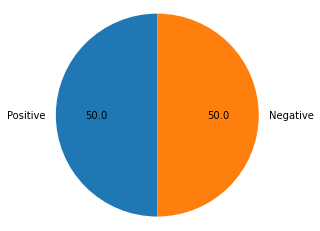

In [16]:
fig = plt.figure(figsize=(4,4))

labels = 'Positive' , 'Negative'

sizes = [len(all_positive_tweets) , len(all_negative_tweets)]

plt.pie(sizes,labels=labels,autopct='%1.1f',shadow=False,startangle=90)

plt.axis('equal')

plt.show()

In [21]:
# printing the positive text in green
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

#printing negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@BowenBBC beautiful...winter? It's like summer in Russia :)
@howeverhood @bubblegumcam one year later and we haven't even met :(


Preprocessing is an important part of sentiment analysis

these are the following tasks :

-tokenizing the string

-lowercasing

-removing stop words and punctutation

-stemming


In [23]:
# lets select one tweet and do all that steps on it

tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shikh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
import re                            # for regular expression
import string                         # for string operations

from nltk.corpus import stopwords  #module for stop words that come with NLTK
from nltk.stem import PorterStemmer    #module for stemming 
from nltk.tokenize import TweetTokenizer  # for tokenizing strings


We will now remove some commonly used substrings like hashtags, retweet marks and hyperlinks using the re library

In [28]:
print('\033[92m' + tweet)

#remove the old style retweet text "RT"
tweet2 = re.sub( r'^RT[\s]+' , '' ,tweet)

#remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*' , '' , tweet2)

#remove hashtag (only the # sign)
tweet2 = re.sub(r'#' , '' ,tweet2)

print('\033[94m' + tweet2)


My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


TOKENIZE THE STRING into individual words without blanks or tabs and also convert them into lowercase

In [33]:
print('\033[92m' + tweet2)

#instantiate the tokenizer class
tokenizer = TweetTokenizer(preserve_case=False,
                          strip_handles=True,
                          reduce_len = True)

#tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print('\033[94m')
print('\nTokenized string : ')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string : 
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


Next step is to remove stop words and punctuation.
stop words are words that dont add any significant meaning to the text

In [36]:
#importing the english stop words from nltk
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctutation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

We can see that the stop words list above contains some words that could be important in some contexts. These could be words like i, not, between, because, won, against. You might need to customize the stop words list for some applications. For our exercise, we will use the entire list.

For the punctuation, we saw earlier that certain groupings like ':)' and '...' should be retained when dealing with tweets because they are used to express emotions. In other contexts, like medical analysis, these should also be removed.

In [38]:
#time to clean up our tokenized tweet
print('\033[92m')
print(tweet_tokens)

tweets_clean = []

for word in tweet_tokens:
    if(word not in stopwords_english 
       and 
       word not in string.punctuation):
        tweets_clean.append(word)

print('\033[94m')
print("after the removal of stopm words and puncs :")
print(tweets_clean)
        


['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

after the removal of stopm words and puncs :
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### STEmming
process to convert a word to its most general form or stem
this helps to reduce the size of the vocabulary

consider the words:
-learn

-learning

-learned

-learnt

all these words are stemmed from its common root 'learn'.

in some cases the stemming will produce words that are not correct inn the speeling, example - happi, sunni etc.
because it chooses the most common stem for related words.

happy
happiness
happier

happi is the most commonly used in all these

we cant choose happ because it a a root for happen.

In [42]:
print('\033[92m')
print(tweets_clean)

#instantiate the stemming class
stemmer = PorterStemmer()

#create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  #stemming word
    tweets_stem.append(stem_word)

print('\033[94m')
print('stemmed words : ')
print(tweets_stem)


['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words : 
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


the end

process_tweet()

this is a function implemented that we will use to do it in a single step


In [43]:
# tweet = all_positive_tweets[2277]
# tweet_final = process_tweet(tweet)
#print(tweet_final)